In [1]:
#Import libraries 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
import sklearn
%matplotlib inline

In [2]:
#read data into dataframe
data = pd.read_csv('C://Users//VISHAL//PycharmProjects//svm/testdata.csv')
#print(data)
data.head()
print(data.keys())

Index(['-6.57E-01', '7.91E-01', '0'], dtype='object')


In [3]:
X = data.iloc[0:200, [0, 1]].values
y = data.iloc[0:200, 2].values
#Split the data into training data and testing data 
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
print(y_train)

[1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0
 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1
 0 1 1 0 1 1 1 1 0 0 0]


In [4]:
# Sci-kit learn svm model with linear kernel method
clf=GridSearchCV(svm.SVC(kernel='linear', C=1),cv=5,
                param_grid={'C': [1, 10, 100, 1000]})
clf.fit(x_train, np.ravel(y_train))
print("Training set score: %f" % clf.score(x_train, y_train))
print("Linear accuracy score: %f" % clf.score(x_test, y_test))

Training set score: 0.855346
Linear accuracy score: 0.875000


In [5]:
#Predict the values
predictions = clf.predict(x_test)
#Accuracy score for the prediction 
print(accuracy_score(y_test,predictions))

0.875


[0 1]


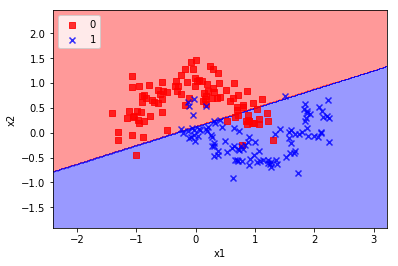

In [6]:
#Plot the graph for svm linear kernel
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
  # print(X[:,0])
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
  
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
 
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  
   Z = Z.reshape(xx1.shape)

   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())
   print(np.unique(y))

   # plot class samples
   for idx, cl in enumerate(np.unique(y)):
      #print(idx)
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker=markers[idx], label=cl)
        
plot_decision_regions(X, y, classifier=clf)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show() 

In [7]:
# Sci-kit learn svm model with polynomial kernel method
clf=GridSearchCV(svm.SVC(kernel='poly',degree=3,C=1),cv=5,
                param_grid={'C': [1, 10, 100, 1000]})

clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print(clf.best_params_)
print("Polynomial accuracy score: %f" % clf.score(x_test, y_test))

predictions = clf.predict(x_test)
predictions
#Accuracy score for the prediction 
print(accuracy_score(y_test,predictions))

{'C': 10}
Polynomial accuracy score: 0.900000
0.9


[0 1]


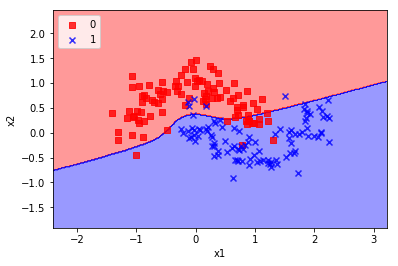

In [8]:
#Plot the graph for svm polynomial kernel
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
  # print(X[:,0])
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
  
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
 
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  
   Z = Z.reshape(xx1.shape)

   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())
   print(np.unique(y))

   # plot class samples
   for idx, cl in enumerate(np.unique(y)):
      #print(idx)
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker=markers[idx], label=cl)

plot_decision_regions(X, y, classifier=clf)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()         

In [9]:
# Sci-kit learn svm model with gaussian kernel method
clf=GridSearchCV(svm.SVC(kernel='rbf'),cv=5,
               param_grid={'C': [1, 10, 100, 1000],
                         'gamma':[0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]})
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print(clf.best_params_)
print("Test set score: %f" % clf.score(x_test, y_test))

predictions = clf.predict(x_test)
predictions
#Accuracy score for the prediction 
print(accuracy_score(y_test,predictions))

{'C': 10, 'gamma': 1}
Test set score: 0.925000
0.925


[0 1]


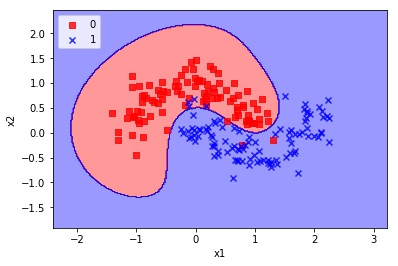

In [10]:
# Plot the graph for svm Gaussian kernel 
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
  # print(X[:,0])
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
  
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  
   Z = Z.reshape(xx1.shape)

   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())
   print(np.unique(y))

   # plot class samples
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker=markers[idx], label=cl)
 
plot_decision_regions(X, y, classifier=clf)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show() 